In [65]:
import os
import glob
import pandas as pd
from tqdm import tqdm
import boto3
from io import BytesIO
from io import StringIO

In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [67]:
# Initialize S3 client
s3 = boto3.client('s3')

# Function to load data 
bucket_name = 'ml-stack-759578648427-us-west-2'

def from_s3(bucket_name, file_name):
    response = s3.get_object(Bucket=bucket_name, Key=file_name)
    ext = os.path.splitext(file_name)[1]
    if ext == '.gz':
        data = pd.read_csv(BytesIO(response['Body'].read()), compression='gzip')
    elif ext == '.csv':
        data = pd.read_csv(BytesIO(response['Body'].read()))
    else:
        data = pd.read_excel(BytesIO(response['Body'].read()), sheet_name='DX_to_CCSR_Mapping', header=1)
    return data

# Import Data 

In [68]:
file_name = 'MIMIC/Modeling/baseline_results.csv'
baseline_results = from_s3(bucket_name, file_name) 
baseline_results.head()

,bacteria,antibiotic,accuracy,precision,recall,f1_score
0,ESCHERICHIA COLI,AMPICILLIN,0.503929,0.503929,1.0,0.670150
1,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,0.611413,0.611413,1.0,0.758853
2,ESCHERICHIA COLI,CEFAZOLIN,0.805609,0.805609,1.0,0.892341
3,ESCHERICHIA COLI,CEFEPIME,0.915470,0.915470,1.0,0.955870
4,ESCHERICHIA COLI,CEFTAZIDIME,0.921242,0.921242,1.0,0.959007


In [69]:
file_name = 'MIMIC/Cleaned/final_modeling_dataset.csv'
df_final = from_s3(bucket_name, file_name) 
df_final.head()

,subject_id,charttime,org_name,ab_name,susceptible_flag,Blood - Hematocrit,Blood - Platelet Count,Blood - MCV,Blood - Red Blood Cells,Blood - RDW,Blood - MCH,Blood - MCHC,Blood - White Blood Cells,Blood - Creatinine,Blood - Urea Nitrogen,Blood - Potassium,Blood - Sodium,Blood - Chloride,Blood - Bicarbonate,Blood - Anion Gap,Blood - Hemoglobin,Blood - Basophils,Blood - Lymphocytes,Blood - Eosinophils,"Blood - Calcium, Total",Blood - Alanine Aminotransferase (ALT),Blood - Asparate Aminotransferase (AST),Blood - Magnesium,Blood - Phosphate,Blood - INR(PT),Blood - PT,Blood - Alkaline Phosphatase,"Blood - Bilirubin, Total",Blood - Neutrophils,Blood - PTT,Urine - Specific Gravity,Urine - pH,anchor_age,Height (Inches),Weight (Lbs),bp_systolic,bp_diastolic,procedure_ct,days_since_last_proc,Blood - Glucose,Blood - Monocytes,Urine - Urine Color,Urine - Urine Appearance,Urine - Ketone,Urine - Glucose,Urine - Protein,Urine - Epithelial Cells,Urine - RBC,Urine - WBC,99,BLD001,BLD002,BLD003,BLD004,BLD005,BLD006,BLD007,BLD008,BLD009,BLD010,CIR001,CIR002,CIR003,CIR004,CIR005,CIR006,CIR007,CIR008,CIR009,CIR010,CIR011,CIR012,CIR013,CIR014,CIR015,CIR016,CIR017,CIR018,CIR019,CIR020,CIR021,CIR022,CIR023,CIR024,CIR025,CIR026,CIR027,CIR028,CIR029,CIR030,CIR031,CIR032,CIR033,CIR034,CIR035,CIR036,CIR037,CIR038,CIR039,DEN001,DEN002,DEN003,DIG001,DIG002,DIG003,DIG004,DIG005,DIG006,DIG007,DIG008,DIG009,DIG010,DIG011,DIG012,DIG013,DIG014,DIG015,DIG016,DIG017,DIG018,DIG019,DIG020,DIG021,DIG022,DIG023,DIG024,DIG025,EAR001,EAR002,EAR003,EAR004,EAR005,EAR006,END001,END002,END003,END004,END005,END006,END007,END008,END009,END010,END011,END012,END013,END014,END015,END016,END017,EXT001,EXT002,EXT003,EXT004,EXT005,EXT006,EXT007,EXT008,EXT009,EXT010,EXT011,EXT012,EXT013,EXT014,EXT015,EXT016,EXT017,EXT018,EXT019,EXT020,EXT021,EXT022,EXT023,EXT024,EXT025,EXT026,EXT027,EXT028,EXT029,EXT030,EYE001,EYE002,EYE003,EYE004,EYE005,EYE006,EYE007,EYE008,EYE009,EYE010,EYE011,EYE012,FAC001,FAC002,FAC003,FAC004,FAC005,FAC006,FAC008,FAC009,FAC010,FAC012,FAC013,FAC014,FAC015,FAC016,FAC017,FAC019,FAC020,FAC022,FAC023,FAC024,FAC025,FAC026,FAC027,FAC028,FAC029,FAC030,GEN001,GEN002,GEN003,GEN004,GEN005,GEN006,GEN007,GEN008,GEN009,GEN010,GEN011,GEN012,GEN013,GEN014,GEN015,GEN016,GEN017,GEN018,GEN019,GEN020,GEN021,GEN022,GEN023,GEN024,GEN025,GEN026,INF001,INF002,INF003,INF004,INF005,INF006,INF007,INF008,INF009,INF010,INF011,INF012,INJ001,INJ002,INJ003,INJ004,INJ005,INJ006,INJ007,INJ008,INJ009,INJ010,INJ011,INJ012,INJ013,INJ014,INJ015,INJ016,INJ017,INJ018,INJ019,INJ020,INJ021,INJ022,INJ023,INJ024,INJ025,INJ026,INJ027,INJ028,INJ029,INJ030,INJ031,INJ032,INJ033,INJ034,INJ035,INJ036,INJ037,INJ038,INJ039,INJ040,INJ041,INJ042,INJ043,INJ044,INJ045,INJ046,INJ047,INJ048,INJ049,INJ050,INJ054,INJ055,INJ056,INJ057,INJ059,INJ060,INJ061,INJ062,INJ063,INJ064,INJ065,INJ066,INJ067,INJ069,INJ070,INJ071,INJ072,INJ073,INJ074,INJ075,INJ076,MAL001,MAL002,MAL003,MAL004,MAL005,MAL006,MAL007,MAL008,MAL009,MAL010,MBD001,MBD002,MBD003,MBD004,MBD005,MBD006,MBD007,MBD008,MBD009,MBD010,MBD011,MBD012,MBD013,MBD014,MBD017,MBD018,MBD019,MBD020,MBD021,MBD022,MBD023,MBD024,MBD025,MBD026,MBD027,MBD028,MBD032,MBD034,MUS001,MUS002,MUS003,MUS004,MUS005,MUS006,MUS007,MUS008,MUS009,MUS010,MUS011,MUS012,MUS013,MUS014,MUS015,MUS016,MUS017,MUS020,MUS021,MUS022,MUS023,MUS024,MUS025,MUS026,MUS027,MUS028,MUS029,MUS030,MUS031,MUS032,MUS033,MUS034,MUS035,MUS036,MUS037,MUS038,NEO001,NEO002,NEO003,NEO004,NEO005,NEO006,NEO007,NEO008,NEO009,NEO010,NEO011,NEO012,NEO013,NEO014,NEO015,NEO016,NEO017,NEO018,NEO019,NEO020,NEO021,NEO022,NEO023,NEO024,NEO025,NEO026,NEO027,NEO028,NEO029,NEO030,NEO031,NEO032,NEO033,NEO034,NEO035,NEO036,NEO037,NEO038,NEO039,NEO040,NEO041,NEO042,NEO043,NEO044,NEO045,NEO046,NEO047,NEO048,NEO049,NEO050,NEO051,NEO052,NEO054,NEO056,NEO057,NEO058,NEO059,NEO060,NEO061,NEO062,NEO063,NEO064,NEO065,NEO066,NEO067,NEO068,NEO069,NEO070,NEO071,NEO072,NEO073,NEO074,NEO075,NEO078,NVS001,NVS002,NVS003,NVS004,NVS005,NVS006,NVS007,NVS00

In [97]:
# set pairs 
bacteria_antibiotic_pairs = [('ESCHERICHIA COLI', 'AMPICILLIN'),
 ('ESCHERICHIA COLI', 'AMPICILLIN/SULBACTAM'),
 ('ESCHERICHIA COLI', 'CEFAZOLIN'),
 ('ESCHERICHIA COLI', 'CEFEPIME'),
 ('ESCHERICHIA COLI', 'CEFTAZIDIME'),
 ('ESCHERICHIA COLI', 'CEFTRIAXONE'),
 ('ESCHERICHIA COLI', 'CIPROFLOXACIN'),
 ('ESCHERICHIA COLI', 'GENTAMICIN'),
 #('ESCHERICHIA COLI', 'MEROPENEM'),
 ('ESCHERICHIA COLI', 'NITROFURANTOIN'),
 ('ESCHERICHIA COLI', 'PIPERACILLIN/TAZO'),
 ('ESCHERICHIA COLI', 'TOBRAMYCIN'),
 ('ESCHERICHIA COLI', 'TRIMETHOPRIM/SULFA'),
 ('KLEBSIELLA PNEUMONIAE', 'AMPICILLIN/SULBACTAM'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFAZOLIN'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFEPIME'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFTAZIDIME'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFTRIAXONE'),
 ('KLEBSIELLA PNEUMONIAE', 'CIPROFLOXACIN'),
 ('KLEBSIELLA PNEUMONIAE', 'GENTAMICIN'),
 #('KLEBSIELLA PNEUMONIAE', 'MEROPENEM'),
 ('KLEBSIELLA PNEUMONIAE', 'NITROFURANTOIN'),
 ('KLEBSIELLA PNEUMONIAE', 'PIPERACILLIN/TAZO'),
 ('KLEBSIELLA PNEUMONIAE', 'TOBRAMYCIN'),
 ('KLEBSIELLA PNEUMONIAE', 'TRIMETHOPRIM/SULFA'),
 ('PSEUDOMONAS AERUGINOSA', 'CEFEPIME'),
 ('PSEUDOMONAS AERUGINOSA', 'CEFTAZIDIME'),
 ('PSEUDOMONAS AERUGINOSA', 'CIPROFLOXACIN'),
 ('PSEUDOMONAS AERUGINOSA', 'GENTAMICIN'),
 #('PSEUDOMONAS AERUGINOSA', 'MEROPENEM'),
 ('PSEUDOMONAS AERUGINOSA', 'PIPERACILLIN/TAZO'),
 ('PSEUDOMONAS AERUGINOSA', 'TOBRAMYCIN')]

# Modeling

In [71]:
from sklearn.ensemble import HistGradientBoostingClassifier 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re 

In [72]:
modeling_df = df_final.copy()
modeling_df.shape

(78304, 1117)

In [73]:
# regroup races into broader categories 
race_columns = [col for col in modeling_df.columns if col.startswith('race_')]
print(f"Identified {len(race_columns)}")

high_level_mapping = {
        r'race_ASIAN': 'Asian',
        r'race_BLACK': 'Black',
        r'race_HISPANIC': 'Hispanic/Latino',
        r'race_WHITE': 'White',
        r'race_MULTIPLE|race_OTHER|race_PATIENT DECLINED|race_UNABLE|race_UNKNOWN|race_NATIVE|race_SOUTH AMERICAN|race_PORTUGUESE': 'Other/Unknown'
    }

for high_level_category in set(high_level_mapping.values()):
        modeling_df[f'broad_race_{high_level_category}'] = 0
    
# Iterate through race columns and map to high-level categories
for race_col in race_columns:
    for pattern, high_level in high_level_mapping.items():
        if re.match(pattern, race_col):
            # If this column matches this high-level category pattern,
            # set the high-level category to 1 for any rows where this column is 1
            modeling_df.loc[modeling_df[race_col] == 1, f'broad_race_{high_level}'] = 1
            break

modeling_df.drop(columns=race_columns, inplace=True)

Identified 32


In [74]:
# column for stratification 
race_columns = [col for col in modeling_df.columns if col.startswith('broad_race_')]
print(f"Identified {len(race_columns)}")

modeling_df['race_category'] = 'Other/Unknown'
for col in race_columns:
    modeling_df.loc[modeling_df[col] == 1, 'race_category'] = col.replace('broad_race_', '')

modeling_df['to_stratify'] = modeling_df['race_category'] + '_' + modeling_df['susceptible_flag'].astype(str)

Identified 5


### Grid Search 

In [101]:
# Dictionary to store trained models
trained_models = {}

# Dictionary to store train and test DataFrames
model_datasets_dict = {}

# List to store results
results = []

# IMPORTANT!!!!!!!
# IMPORTANT!!!!!!!
# IMPORTANT!!!!!!!
# Select the population
#pairs = ecoli_antibiotic_pairs
#pairs = ecoli_antibiotic_pairs
pairs = bacteria_antibiotic_pairs

# Initialize tqdm
progress_bar = tqdm(pairs, desc="Model Training", unit="pair")


for bacteria, antibiotic in progress_bar:
    progress_bar.set_description(f"Training {bacteria} - {antibiotic}")

    # Step 1: Filter the dataset for the specific bacteria-antibiotic combination
    df_subset = modeling_df[(modeling_df['org_name'] == bacteria) & (modeling_df['ab_name'] == antibiotic)]
    
    # Step 2: Train-Test Split (80-20)
    strat = df_subset['to_stratify']
    X = df_subset.drop(columns=['org_name', 'ab_name', 'susceptible_flag', 'charttime', 'subject_id', 'race_category', 'to_stratify'])
    y = df_subset['susceptible_flag']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=strat)
    
    # Step 3: Grid Search with Cross-Validation for gradient boosting tree
    param_grid = {
        # gradient boosting 
        "learning_rate": [0.01, 0.1],
        "min_samples_leaf": [10, 20],
        "max_depth": [8, 10],
        "max_features": [0.275, 0.5],
        "max_iter": [25, 50],
        "l2_regularization":[0.01, 0.1],
        "max_leaf_nodes": [20, 30]
    }

    rf = HistGradientBoostingClassifier(random_state=42, early_stopping=True)
    grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=0) 
    grid_search.fit(X_train, y_train)

    # Step 4: Train the best model on the full training set
    best_params = grid_search.best_params_
    best_rf = HistGradientBoostingClassifier(**best_params, random_state=42)
    best_rf.fit(X_train, y_train)
    
        # Store the trained model dynamically
    model_name = f"rf_{bacteria}_{antibiotic}"
    trained_models[model_name] = best_rf
    
        # Step 5: Evaluate the models
    y_pred_train = best_rf.predict(X_train)
    y_pred_test = best_rf.predict(X_test)
    
    y_prob_train = best_rf.predict_proba(X_train)[:, 1]  # Get probability of class 1
    y_prob_test = best_rf.predict_proba(X_test)[:, 1]  # Get probability of class 1
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Count number of samples total
    total_count = len(y)
    actual_susceptible_count = (y == 1).sum()
    
    # Calculate resistance
    resistance_pctg = 1 - (actual_susceptible_count / total_count)
    
    # Step 6: Store results with all required metrics
    results.append({
            'bacteria': bacteria,
            'antibiotic': antibiotic,
            'resistance_pctg': resistance_pctg,
            'model_name': model_name,
            'train_accuracy': train_accuracy,
            'train_precision': train_precision,
            'train_recall': train_recall,
            'train_f1_score': train_f1,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'test_recall': test_recall,
            'test_f1_score': test_f1,
            'learning_rate': best_params.get('learning_rate'),
            'min_samples_leaf': best_params.get('min_samples_leaf'),
            'max_depth': best_params.get('max_depth'),
            'max_features': best_params.get('max_features'),
            'max_iter': best_params.get('max_iter'),
            'l2_regularization': best_params.get('l2_regularization'),
            'max_leaf_nodes': best_params.get('max_leaf_nodes')
        })
    
    # Step 7: Store train and test DataFrames in dictionary
    if bacteria not in model_datasets_dict:
        model_datasets_dict[bacteria] = {}
    
    model_datasets_dict[bacteria][antibiotic] = {
            'train': pd.DataFrame({'actual': y_train, 'predicted_prob': y_prob_train}),
            'test': pd.DataFrame({'actual': y_test, 'predicted_prob': y_prob_test}),
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df

Training PSEUDOMONAS AERUGINOSA - TOBRAMYCIN: 100%|██████████| 29/29 [18:58<00:00, 39.26s/pair]         


,bacteria,antibiotic,resistance_pctg,model_name,train_accuracy,train_precision,train_recall,train_f1_score,test_accuracy,test_precision,test_recall,test_f1_score,learning_rate,min_samples_leaf,max_depth,max_features,max_iter,l2_regularization,max_leaf_nodes
0,ESCHERICHIA COLI,AMPICILLIN,0.586641,rf_ESCHERICHIA COLI_AMPICILLIN,0.917090,0.920477,0.875236,0.897287,0.648723,0.592287,0.475664,0.527607,0.10,20,8,0.500,50,0.01,30
1,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,0.463574,rf_ESCHERICHIA COLI_AMPICILLIN/SULBACTAM,0.654581,0.608696,0.997093,0.755923,0.576364,0.561265,0.962712,0.709114,0.01,10,8,0.275,25,0.10,30
2,ESCHERICHIA COLI,CEFAZOLIN,0.290393,rf_ESCHERICHIA COLI_CEFAZOLIN,0.901716,0.879052,0.998900,0.935152,0.746364,0.762552,0.933419,0.839378,0.10,20,10,0.500,50,0.01,20
3,ESCHERICHIA COLI,CEFEPIME,0.153762,rf_ESCHERICHIA COLI_CEFEPIME,0.949392,0.943570,1.000000,0.970966,0.863678,0.869524,0.987027,0.924557,0.10,10,10,0.275,50,0.10,20
4,ESCHERICHIA COLI,CEFTAZIDIME,0.148512,rf_ESCHERICHIA COLI_CEFTAZIDIME,0.953198,0.947917,1.000000,0.973262,0.858963,0.864486,0.989305,0.922693,0.10,10,8,0.500,50,0.01,20
5,ESCHERICHIA COLI,CEFTRIAXONE,0.203714,rf_ESCHERICHIA COLI_CEFTRIAXONE,0.918065,0.906708,1.000000,0.951072,0.805278,0.823702,0.961143,0.887131,0.10,20,8,0.275,50,0.10,20
6,ESCHERICHIA COLI,CIPROFLOXACIN,0.409823,rf_ESCHERICHIA COLI_CIPROFLOXACIN,0.727875,0.689767,0.979524,0.809498,0.638182,0.632804,0.921418,0.750314,0.01,20,8,0.500,50,0.01,20
7,ESCHERICHIA COLI,GENTAMICIN,0.150341,rf_ESCHERICHIA COLI_GENTAMICIN,0.951657,0.946157,1.000000,0.972334,0.857273,0.858856,0.995722,0.922239,0.10,10,8,0.500,50,0.01,30
8,ESCHERICHIA COLI,NITROFURANTOIN,0.049863,rf_ESCHERICHIA COLI_NITROFURANTOIN,0.978038,0.977410,1.000000,0.988576,0.948805,0.949886,0.998802,0.973730,0.10,10,8,0.500,25,0.10,30
9,ESCHERICHIA COLI,PIPERACILLIN/TAZO,0.030765,rf_ESCHERICHIA COLI_PIPERACILLIN/TAZO,0.998259,0.998208,1.000000,0.999103,0.969543,0.969512,1.000000,0.984520,0.10,10,8,0.275,25,0.01,20


In [102]:
from datetime import datetime 
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# dump model files to s3 
import pickle

pickle_file = f"histxgb_models_stratification_{timestamp}.pkl"

with open(pickle_file, "wb") as f:
    pickle.dump(trained_models, f)

# Upload the pickle file to S3
s3_key = f"MIMIC/Modeling/{pickle_file}"
with open(pickle_file, 'rb') as data:
    s3.upload_fileobj(data, bucket_name, s3_key)

print(f"Pickle file successfully exported to s3://{bucket_name}/{s3_key}")

Pickle file successfully exported to s3://ml-stack-759578648427-us-west-2/MIMIC/Modeling/histxgb_models_stratification_2025-04-06_16-07-18.pkl


### Re-Run Models

In [103]:
with open(f'output/{pickle_file}', 'rb') as file:
    trained_models = pickle.load(file)

In [105]:
# Dictionary to store train and test DataFrames
model_datasets_dict = {}

# List to store results
results = []

pairs = bacteria_antibiotic_pairs

# Initialize tqdm
progress_bar = tqdm(pairs, desc="Model Running", unit="pair")

# Loop through each bacteria-antibiotic combination
i = 0 
for bacteria, antibiotic in progress_bar:
    progress_bar.set_description(f"Training {bacteria} - {antibiotic}")

    # Step 1: Filter the dataset for the specific bacteria-antibiotic combination
    df_subset = modeling_df[(modeling_df['org_name'] == bacteria) & (modeling_df['ab_name'] == antibiotic)]
    
    # Step 2: Train-Test Split (80-20)
    strat = df_subset['to_stratify']
    X = df_subset.drop(columns=['org_name', 'ab_name', 'susceptible_flag', 'charttime', 'subject_id', 'race_category', 'to_stratify'])
    y = df_subset['susceptible_flag']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=strat)
    
    # Store the trained model dynamically
    model_name = f"rf_{bacteria}_{antibiotic}"

    best_rf = trained_models.get(model_name)
    best_rf.fit(X_train, y_train)
    
    # Step 5: Evaluate the models
    y_pred_train = best_rf.predict(X_train)
    y_pred_test = best_rf.predict(X_test)
    
    y_prob_train = best_rf.predict_proba(X_train)[:, 1]  # Get probability of class 1
    y_prob_test = best_rf.predict_proba(X_test)[:, 1]  # Get probability of class 1
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Count number of samples total
    total_count = len(y)
    actual_susceptible_count = (y == 1).sum()
    
    # Calculate resistance
    resistance_pctg = 1 - (actual_susceptible_count / total_count)
    
    # Step 6: Store results with all required metrics
    results.append({
            'bacteria': bacteria,
            'antibiotic': antibiotic,
            'resistance_pctg': resistance_pctg,
            'model_name': model_name,
            'train_accuracy': train_accuracy,
            'train_precision': train_precision,
            'train_recall': train_recall,
            'train_f1_score': train_f1,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'test_recall': test_recall,
            'test_f1_score': test_f1
        })
    
    # Step 7: Store train and test DataFrames in dictionary
    if bacteria not in model_datasets_dict:
        model_datasets_dict[bacteria] = {}
    
    model_datasets_dict[bacteria][antibiotic] = {
            'train': pd.DataFrame({'actual': y_train, 'predicted_prob': y_prob_train}),
            'test': pd.DataFrame({'actual': y_test, 'predicted_prob': y_prob_test}),
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df

Training PSEUDOMONAS AERUGINOSA - TOBRAMYCIN: 100%|██████████| 29/29 [00:11<00:00,  2.59pair/s]         


,bacteria,antibiotic,resistance_pctg,model_name,train_accuracy,train_precision,train_recall,train_f1_score,test_accuracy,test_precision,test_recall,test_f1_score
0,ESCHERICHIA COLI,AMPICILLIN,0.586641,rf_ESCHERICHIA COLI_AMPICILLIN,0.917090,0.920477,0.875236,0.897287,0.648723,0.592287,0.475664,0.527607
1,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,0.463574,rf_ESCHERICHIA COLI_AMPICILLIN/SULBACTAM,0.654581,0.608696,0.997093,0.755923,0.576364,0.561265,0.962712,0.709114
2,ESCHERICHIA COLI,CEFAZOLIN,0.290393,rf_ESCHERICHIA COLI_CEFAZOLIN,0.901716,0.879052,0.998900,0.935152,0.746364,0.762552,0.933419,0.839378
3,ESCHERICHIA COLI,CEFEPIME,0.153762,rf_ESCHERICHIA COLI_CEFEPIME,0.949392,0.943570,1.000000,0.970966,0.863678,0.869524,0.987027,0.924557
4,ESCHERICHIA COLI,CEFTAZIDIME,0.148512,rf_ESCHERICHIA COLI_CEFTAZIDIME,0.953198,0.947917,1.000000,0.973262,0.858963,0.864486,0.989305,0.922693
5,ESCHERICHIA COLI,CEFTRIAXONE,0.203714,rf_ESCHERICHIA COLI_CEFTRIAXONE,0.918065,0.906708,1.000000,0.951072,0.805278,0.823702,0.961143,0.887131
6,ESCHERICHIA COLI,CIPROFLOXACIN,0.409823,rf_ESCHERICHIA COLI_CIPROFLOXACIN,0.727875,0.689767,0.979524,0.809498,0.638182,0.632804,0.921418,0.750314
7,ESCHERICHIA COLI,GENTAMICIN,0.150341,rf_ESCHERICHIA COLI_GENTAMICIN,0.951657,0.946157,1.000000,0.972334,0.857273,0.858856,0.995722,0.922239
8,ESCHERICHIA COLI,NITROFURANTOIN,0.049863,rf_ESCHERICHIA COLI_NITROFURANTOIN,0.978038,0.977410,1.000000,0.988576,0.948805,0.949886,0.998802,0.973730
9,ESCHERICHIA COLI,PIPERACILLIN/TAZO,0.030765,rf_ESCHERICHIA COLI_PIPERACILLIN/TAZO,0.998259,0.998208,1.000000,0.999103,0.969543,0.969512,1.000000,0.984520


# Evaluation

In [106]:
merged_results_df = results_df.merge(baseline_results,
                      on=["bacteria","antibiotic"], 
                      how="left",
                      suffixes=("_modeled", "_baseline"))

merged_results_df = merged_results_df[[
    'bacteria',
    'antibiotic',
    'resistance_pctg',
    
    'train_accuracy',
    
    'test_accuracy',
    'accuracy',
    
    'train_precision',
    'test_precision',
    'precision',
    
    'train_recall',
    'test_recall',
    'recall',
    
    'train_f1_score',
    'test_f1_score',
    'f1_score'
]]

merged_results_df.rename(columns={
    "accuracy":"accuracy_baseline",
    "precision":"precision_baseline",
    "recall":"recall_baseline",
    "f1_score":"f1_score_baseline"
}, inplace=True)

merged_results_df

,bacteria,antibiotic,resistance_pctg,train_accuracy,test_accuracy,accuracy_baseline,train_precision,test_precision,precision_baseline,train_recall,test_recall,recall_baseline,train_f1_score,test_f1_score,f1_score_baseline
0,ESCHERICHIA COLI,AMPICILLIN,0.586641,0.917090,0.648723,0.503929,0.920477,0.592287,0.503929,0.875236,0.475664,1.0,0.897287,0.527607,0.670150
1,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,0.463574,0.654581,0.576364,0.611413,0.608696,0.561265,0.611413,0.997093,0.962712,1.0,0.755923,0.709114,0.758853
2,ESCHERICHIA COLI,CEFAZOLIN,0.290393,0.901716,0.746364,0.805609,0.879052,0.762552,0.805609,0.998900,0.933419,1.0,0.935152,0.839378,0.892341
3,ESCHERICHIA COLI,CEFEPIME,0.153762,0.949392,0.863678,0.915470,0.943570,0.869524,0.915470,1.000000,0.987027,1.0,0.970966,0.924557,0.955870
4,ESCHERICHIA COLI,CEFTAZIDIME,0.148512,0.953198,0.858963,0.921242,0.947917,0.864486,0.921242,1.000000,0.989305,1.0,0.973262,0.922693,0.959007
5,ESCHERICHIA COLI,CEFTRIAXONE,0.203714,0.918065,0.805278,0.882644,0.906708,0.823702,0.882644,1.000000,0.961143,1.0,0.951072,0.887131,0.937664
6,ESCHERICHIA COLI,CIPROFLOXACIN,0.409823,0.727875,0.638182,0.732396,0.689767,0.632804,0.732396,0.979524,0.921418,1.0,0.809498,0.750314,0.845530
7,ESCHERICHIA COLI,GENTAMICIN,0.150341,0.951657,0.857273,0.897404,0.946157,0.858856,0.897404,1.000000,0.995722,1.0,0.972334,0.922239,0.945928
8,ESCHERICHIA COLI,NITROFURANTOIN,0.049863,0.978038,0.948805,0.956875,0.977410,0.949886,0.956875,1.000000,0.998802,1.0,0.988576,0.973730,0.977962
9,ESCHERICHIA COLI,PIPERACILLIN/TAZO,0.030765,0.998259,0.969543,0.985884,0.998208,0.969512,0.985884,1.000000,1.000000,1.0,0.999103,0.984520,0.992892


In [107]:
# Export results
merged_results_df.to_csv("modeling_results_2025_04_06.csv", index=False)

### Threshold graphs

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to store evaluation results across thresholds
threshold_eval_dict = {}

# Define threshold values (50% to 90% in steps of 5%)
thresholds = np.arange(0.4, 0.95, 0.05)

for bacteria, antibiotics in model_datasets_dict.items():
    if bacteria not in threshold_eval_dict:
        threshold_eval_dict[bacteria] = {}

    for antibiotic, dataframes in antibiotics.items():
        train_df = dataframes['train']
        test_df = dataframes['test']

        # Store metric results for each threshold
        metric_results = {metric: {} for metric in ['accuracy', 'precision', 'recall', 'f1_score']}

        for threshold in thresholds:
            threshold_suffix = str(int(threshold * 100))  # Convert to int percentage (e.g., 0.6 -> "60")

            # Convert probabilities to class labels based on the threshold
            train_pred_labels = (train_df['predicted_prob'] >= threshold).astype(int)
            test_pred_labels = (test_df['predicted_prob'] >= threshold).astype(int)

            # Compute evaluation metrics
            metric_results['accuracy'][threshold_suffix] = [
                accuracy_score(train_df['actual'], train_pred_labels),
                accuracy_score(test_df['actual'], test_pred_labels),
            ]
            metric_results['precision'][threshold_suffix] = [
                precision_score(train_df['actual'], train_pred_labels, zero_division=0),
                precision_score(test_df['actual'], test_pred_labels, zero_division=0),
            ]
            metric_results['recall'][threshold_suffix] = [
                recall_score(train_df['actual'], train_pred_labels, zero_division=0),
                recall_score(test_df['actual'], test_pred_labels, zero_division=0),
            ]
            metric_results['f1_score'][threshold_suffix] = [
                f1_score(train_df['actual'], train_pred_labels, zero_division=0),
                f1_score(test_df['actual'], test_pred_labels, zero_division=0),
            ]

        # Store into the main dictionary
        threshold_eval_dict[bacteria][antibiotic] = metric_results

In [110]:
ecoli_antibiotic_pairs = [('ESCHERICHIA COLI', 'AMPICILLIN'),
 ('ESCHERICHIA COLI', 'AMPICILLIN/SULBACTAM'),
 ('ESCHERICHIA COLI', 'CEFAZOLIN'),
 ('ESCHERICHIA COLI', 'CEFEPIME'),
 ('ESCHERICHIA COLI', 'CEFTAZIDIME'),
 ('ESCHERICHIA COLI', 'CEFTRIAXONE'),
 ('ESCHERICHIA COLI', 'CIPROFLOXACIN'),
 ('ESCHERICHIA COLI', 'GENTAMICIN'),
 #('ESCHERICHIA COLI', 'MEROPENEM'),
 ('ESCHERICHIA COLI', 'NITROFURANTOIN'),
 ('ESCHERICHIA COLI', 'PIPERACILLIN/TAZO'),
 ('ESCHERICHIA COLI', 'TOBRAMYCIN'),
 ('ESCHERICHIA COLI', 'TRIMETHOPRIM/SULFA')]

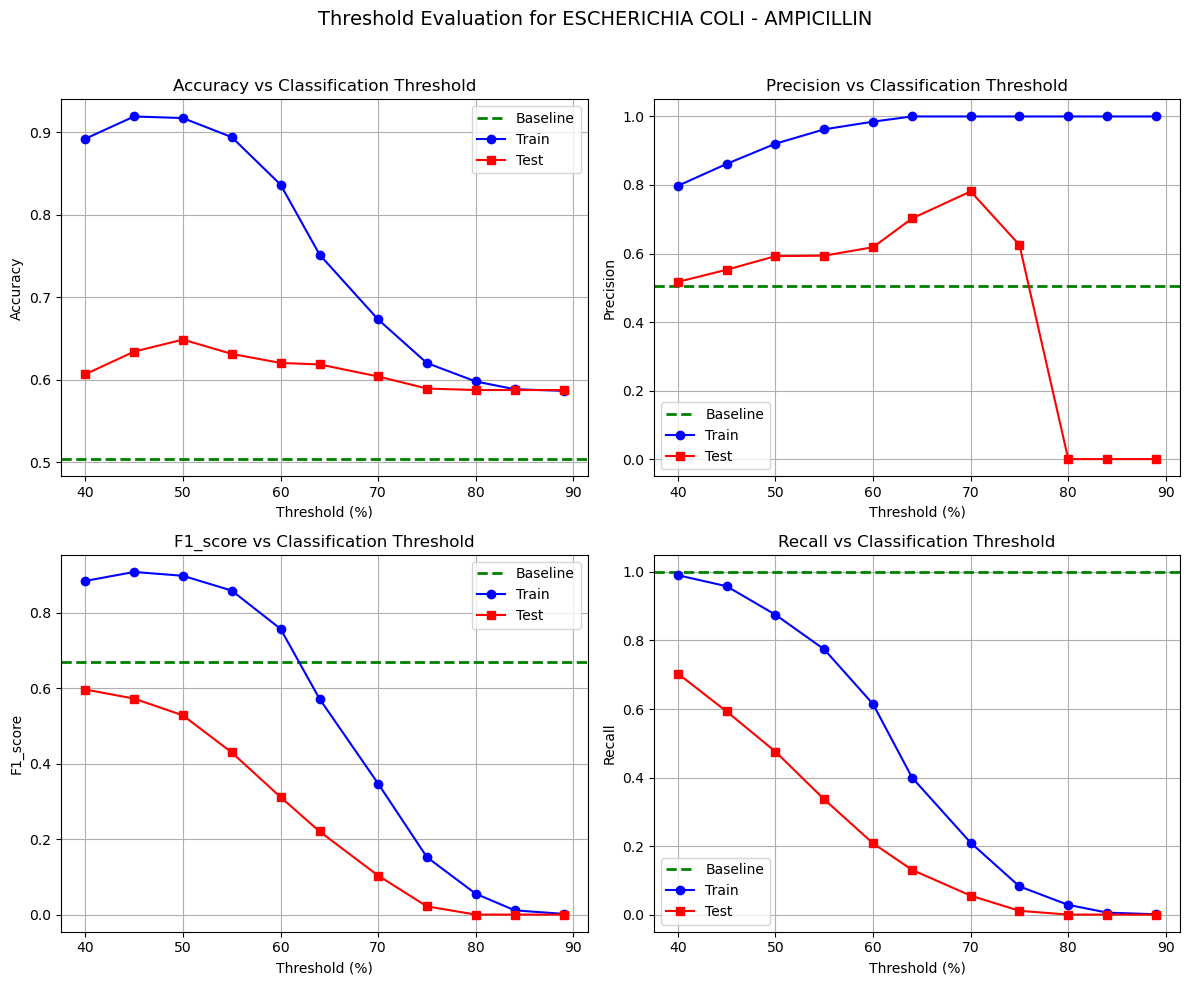

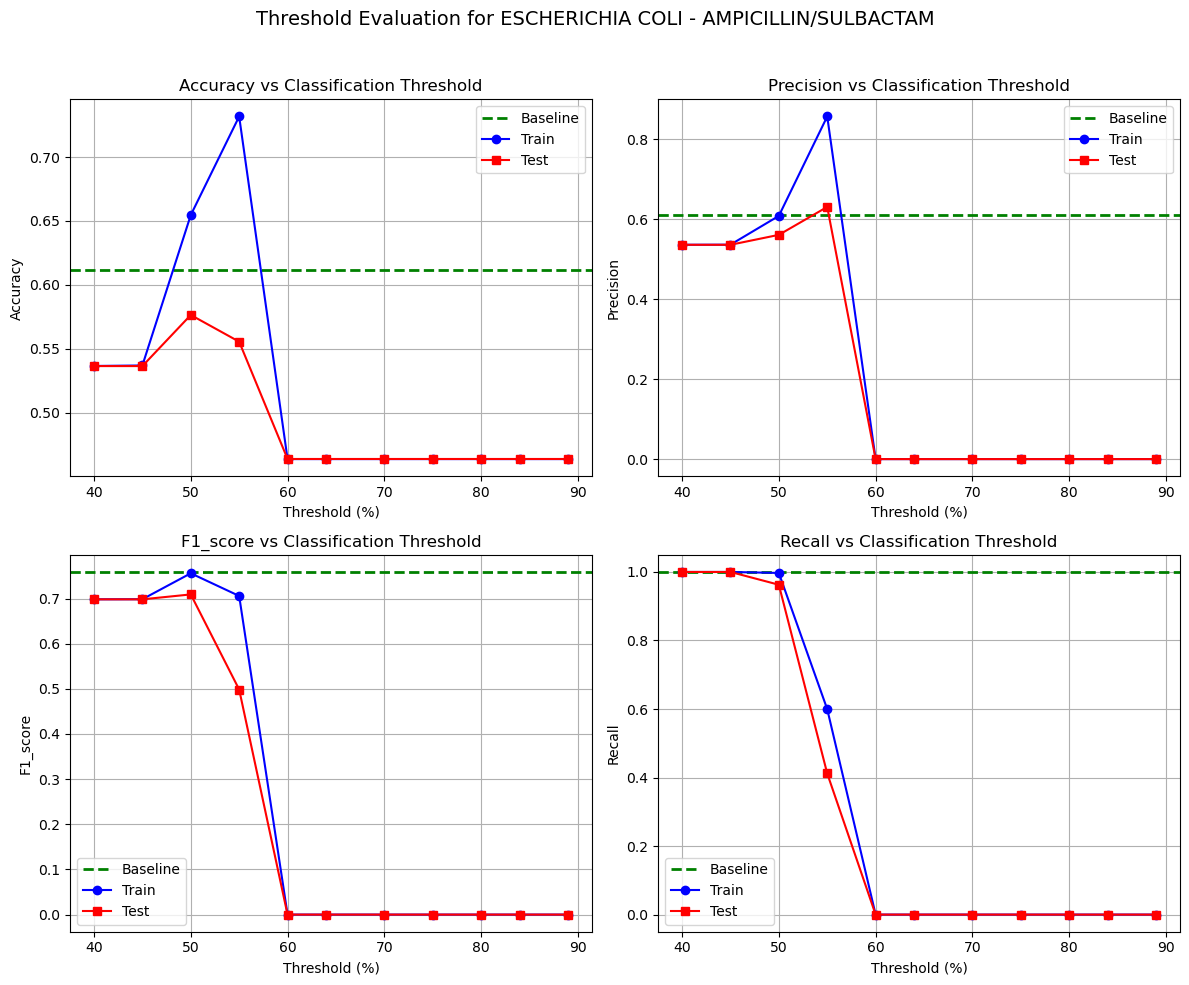

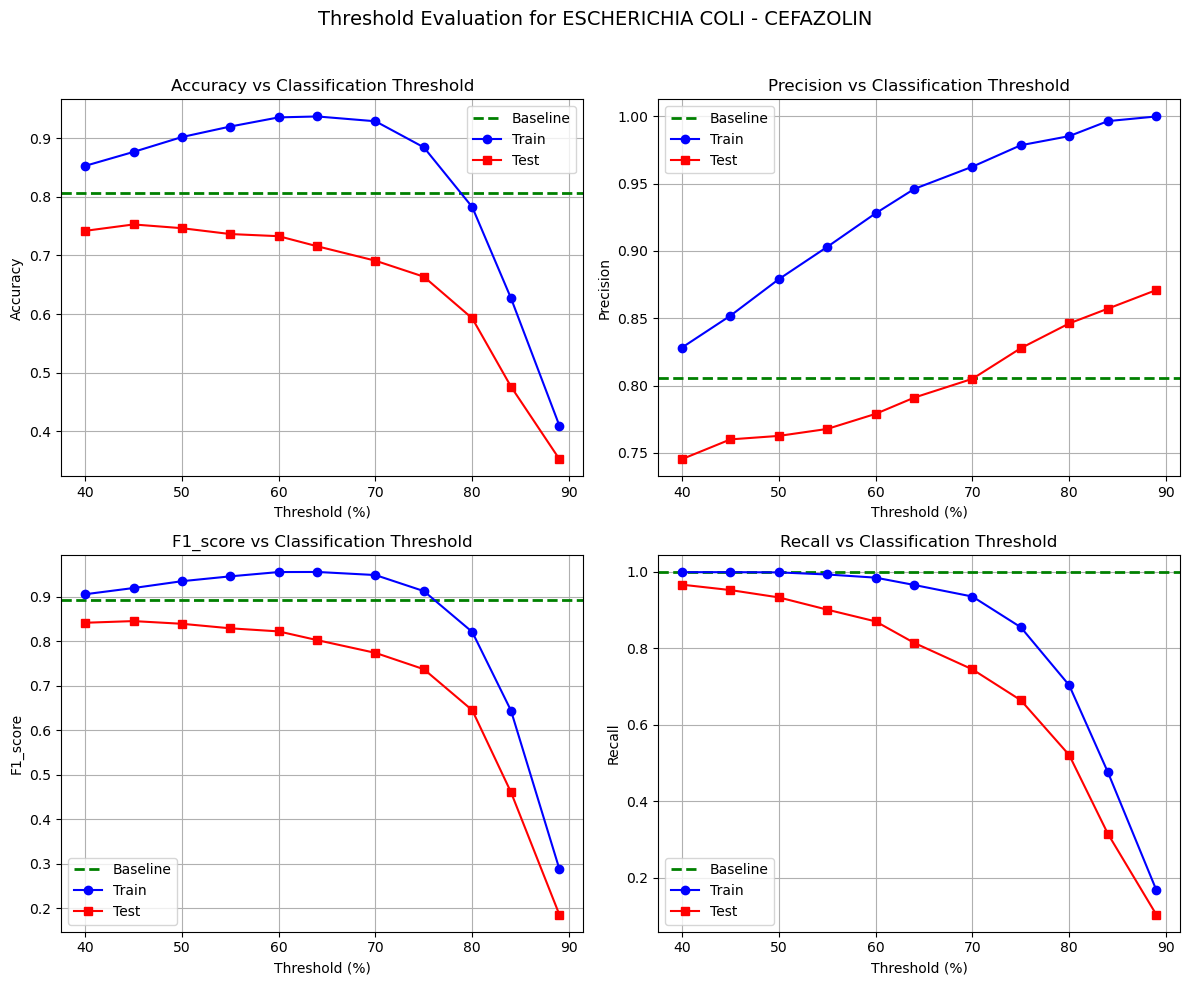

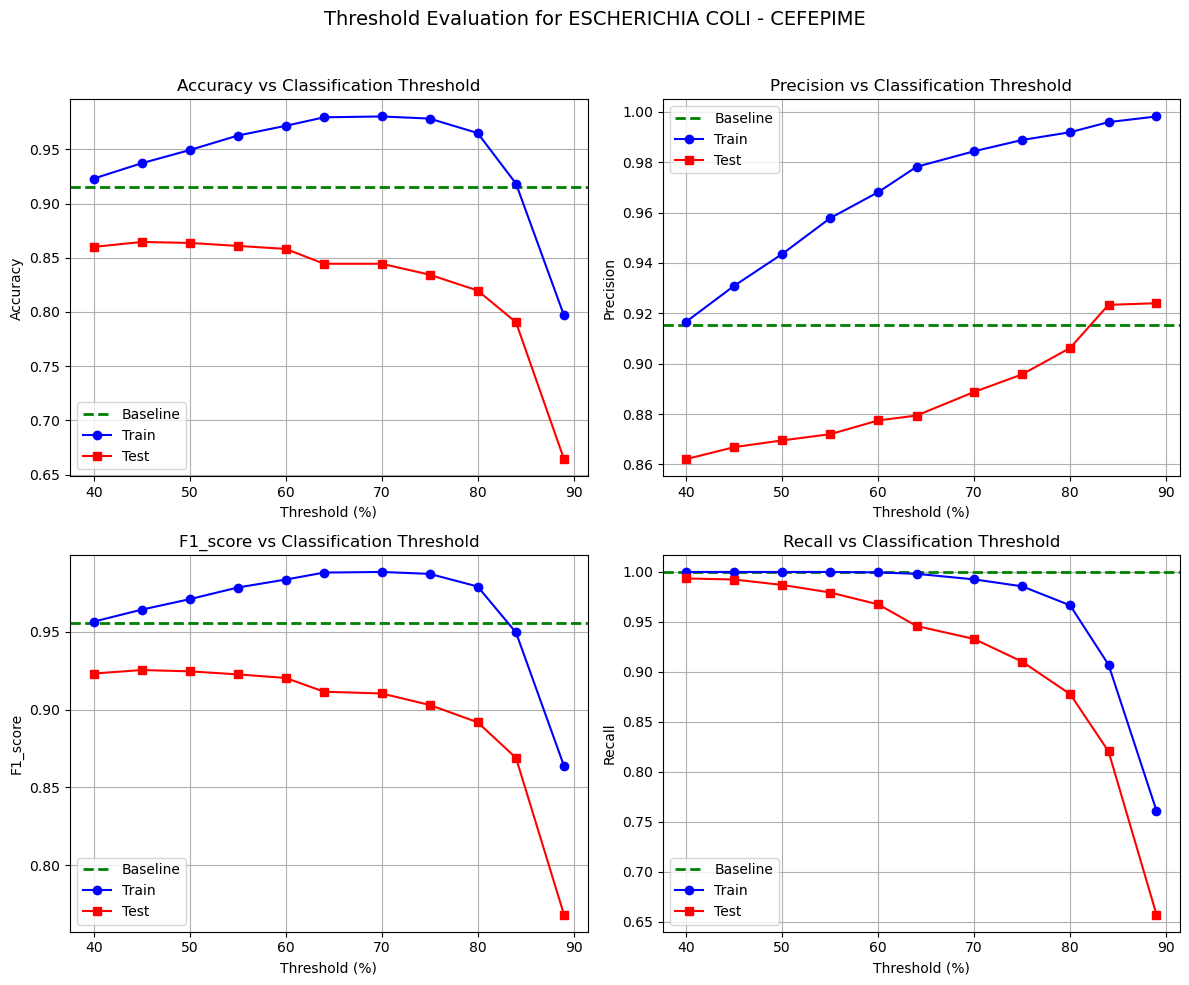

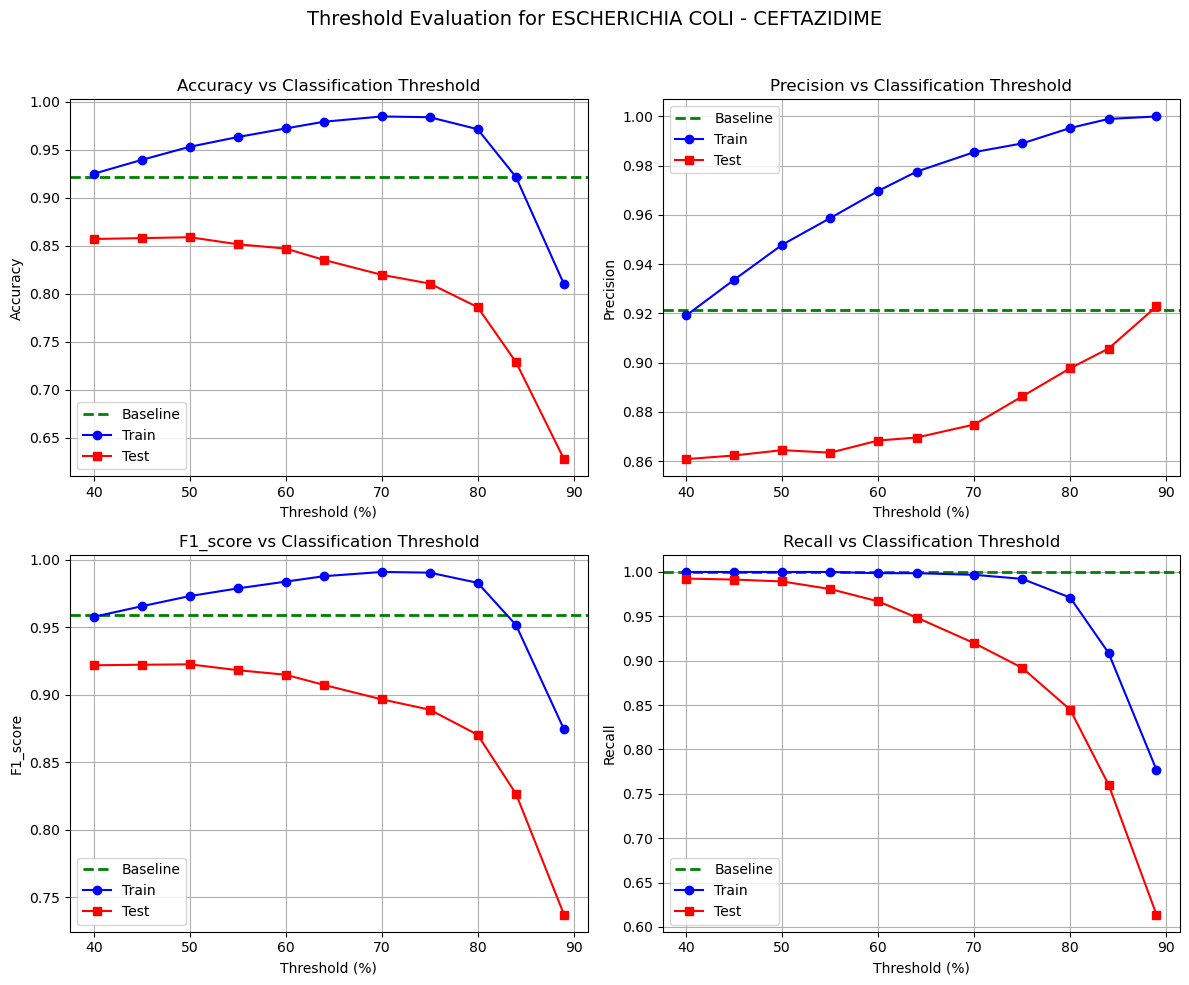

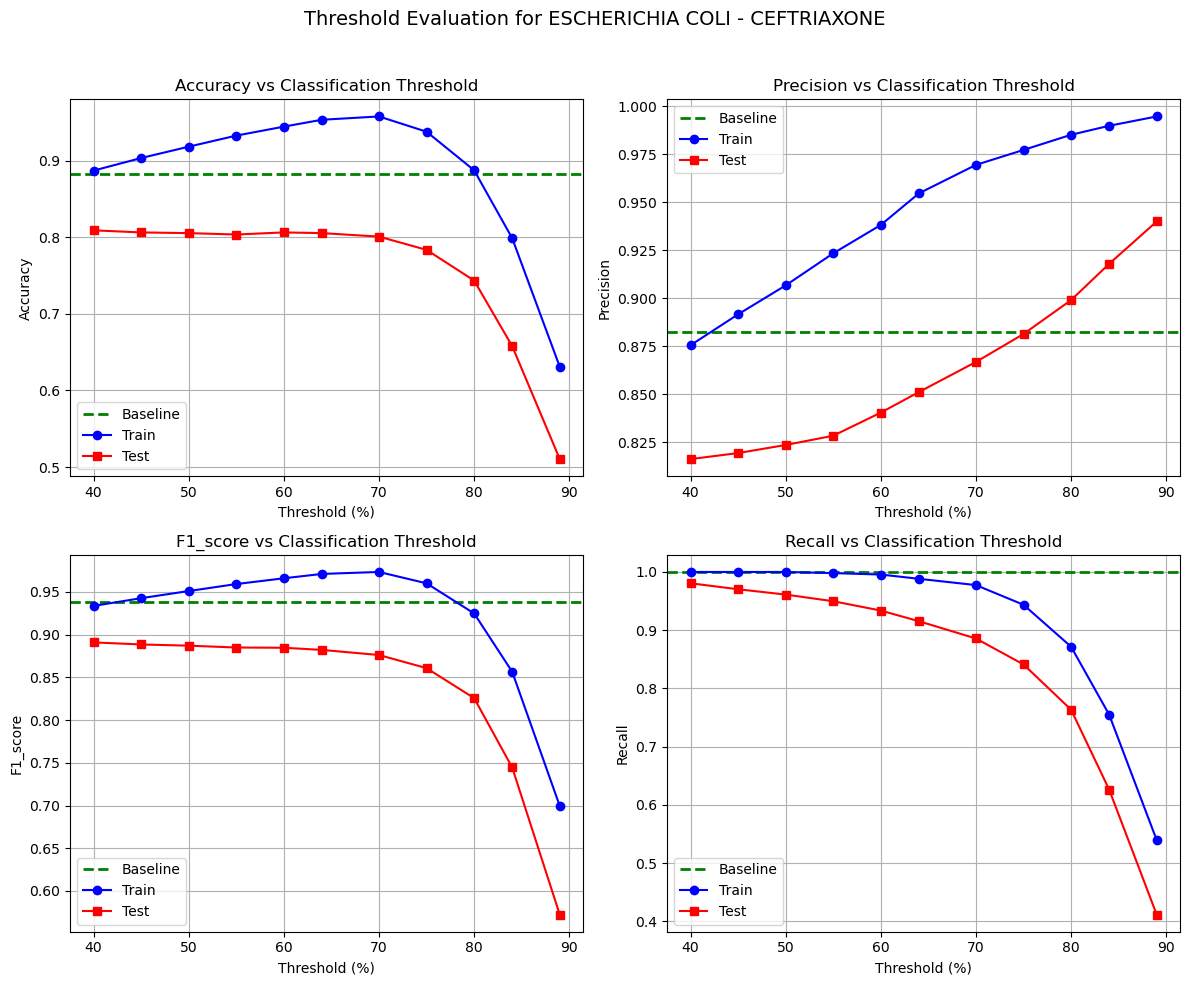

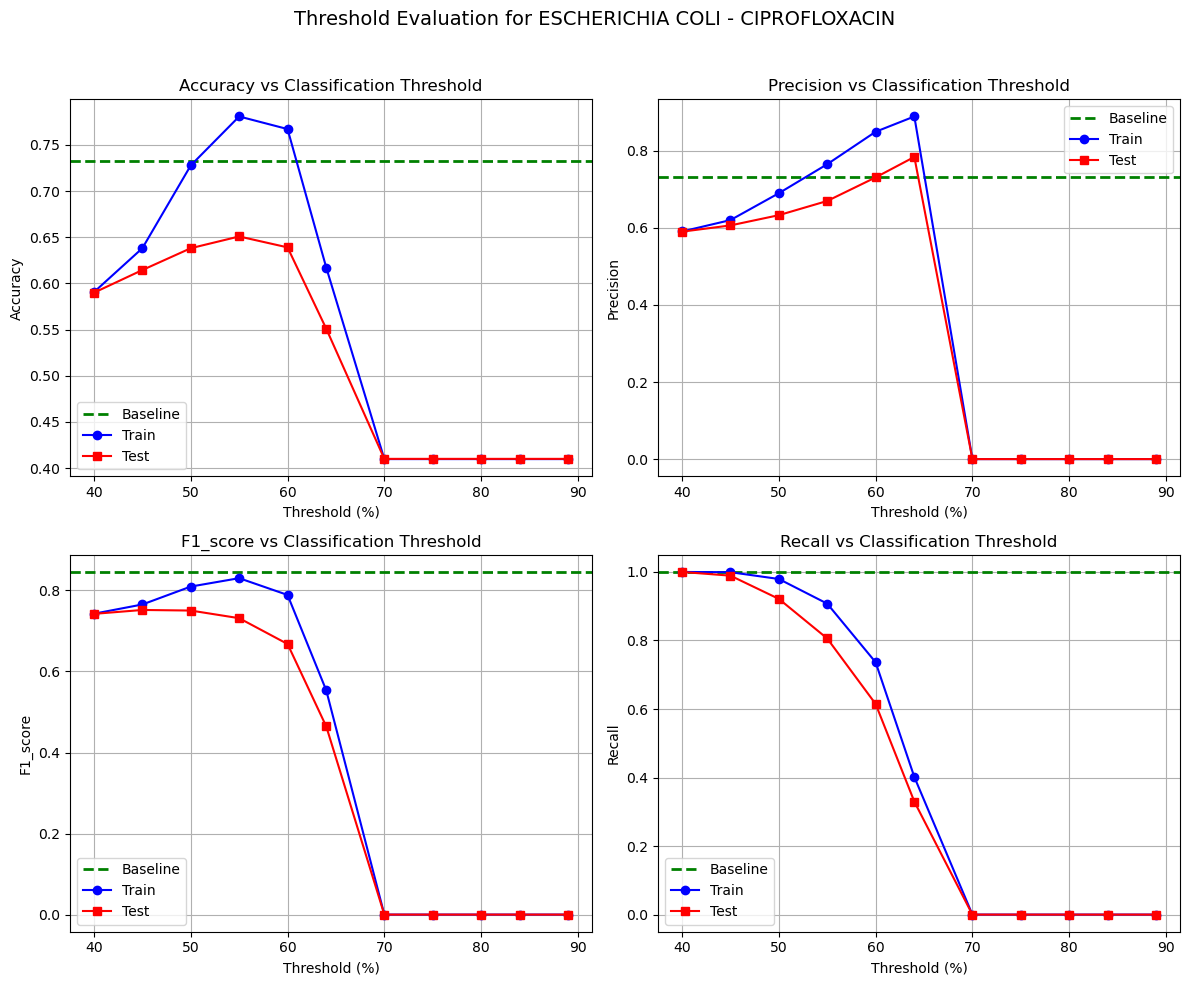

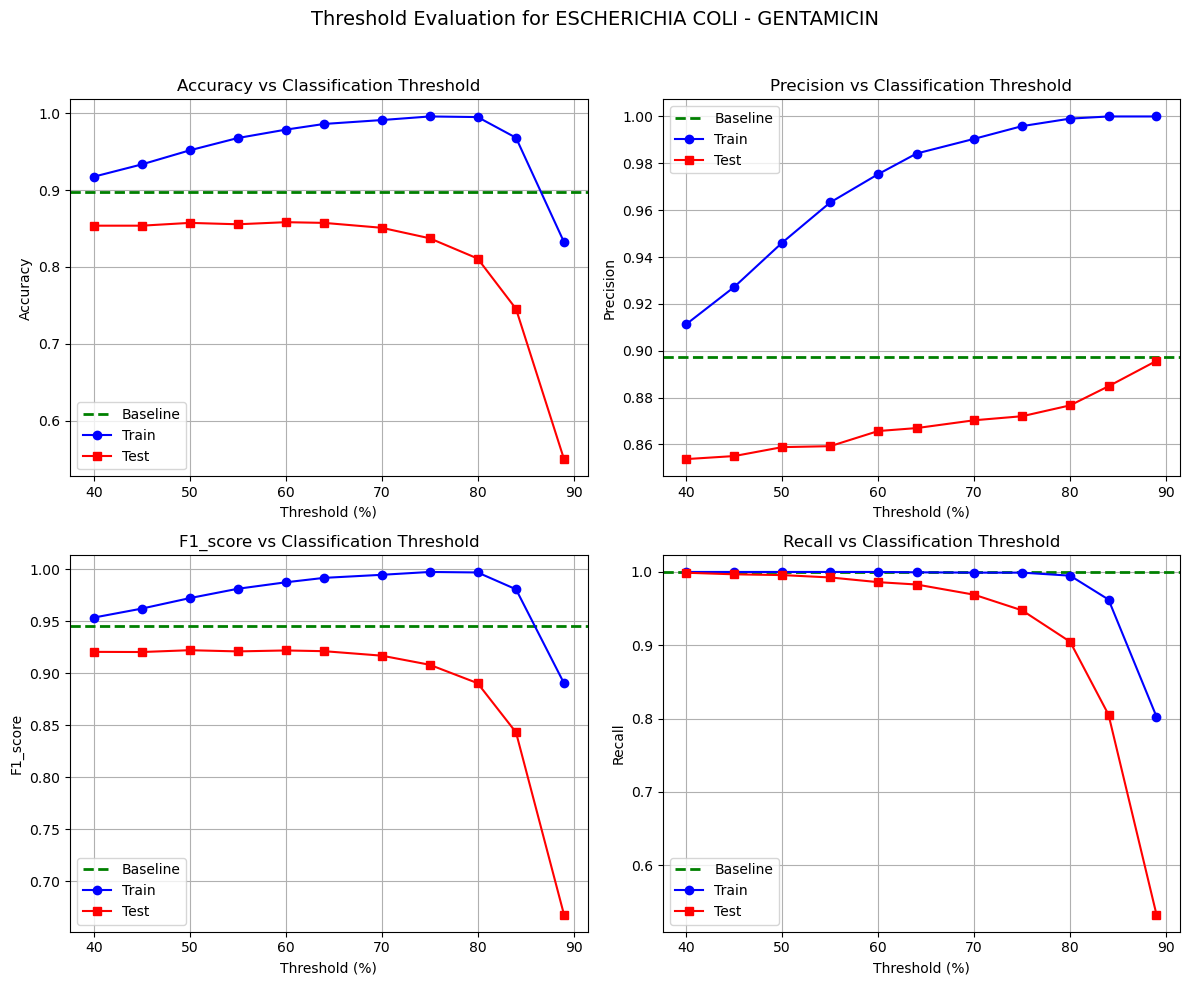

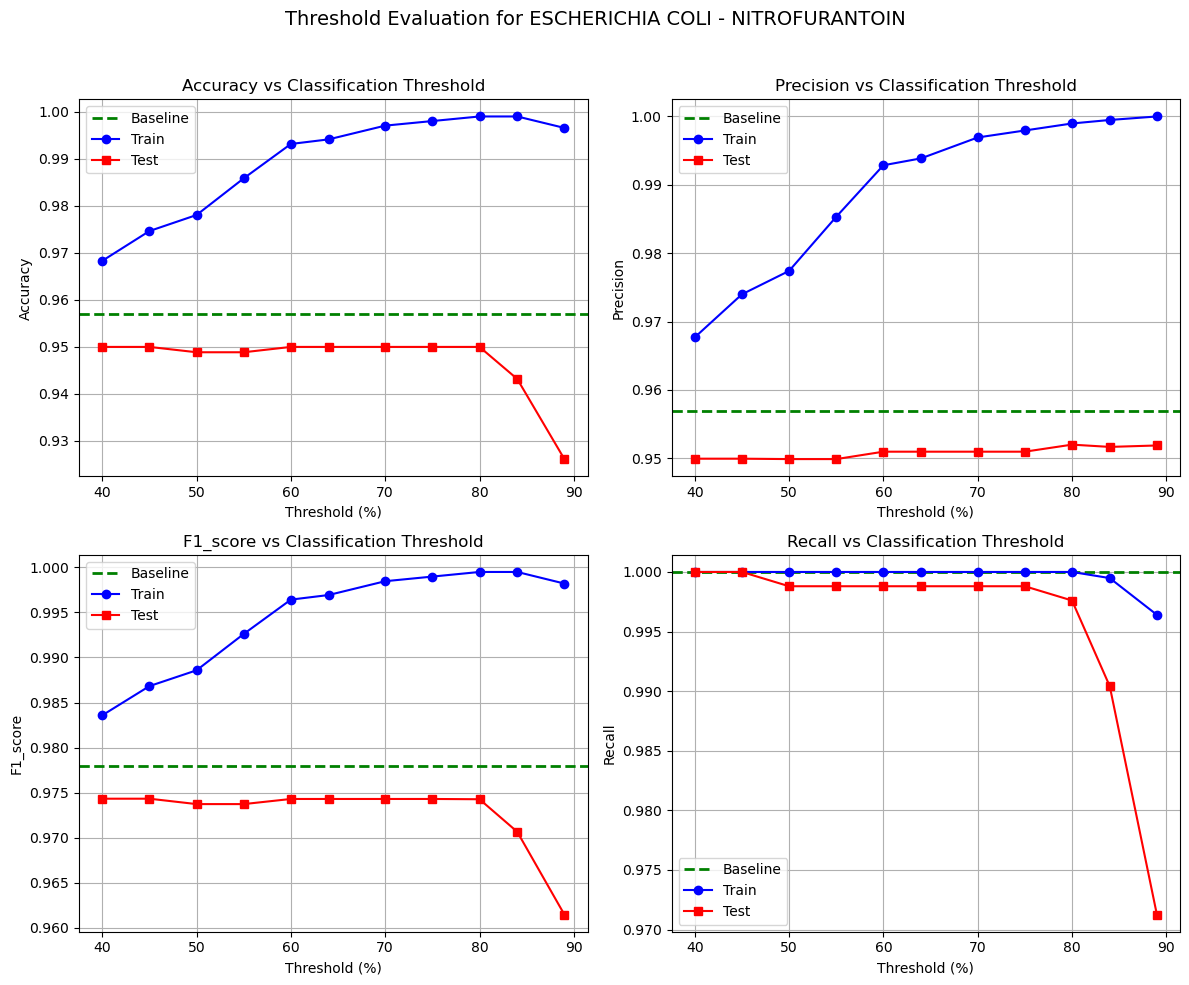

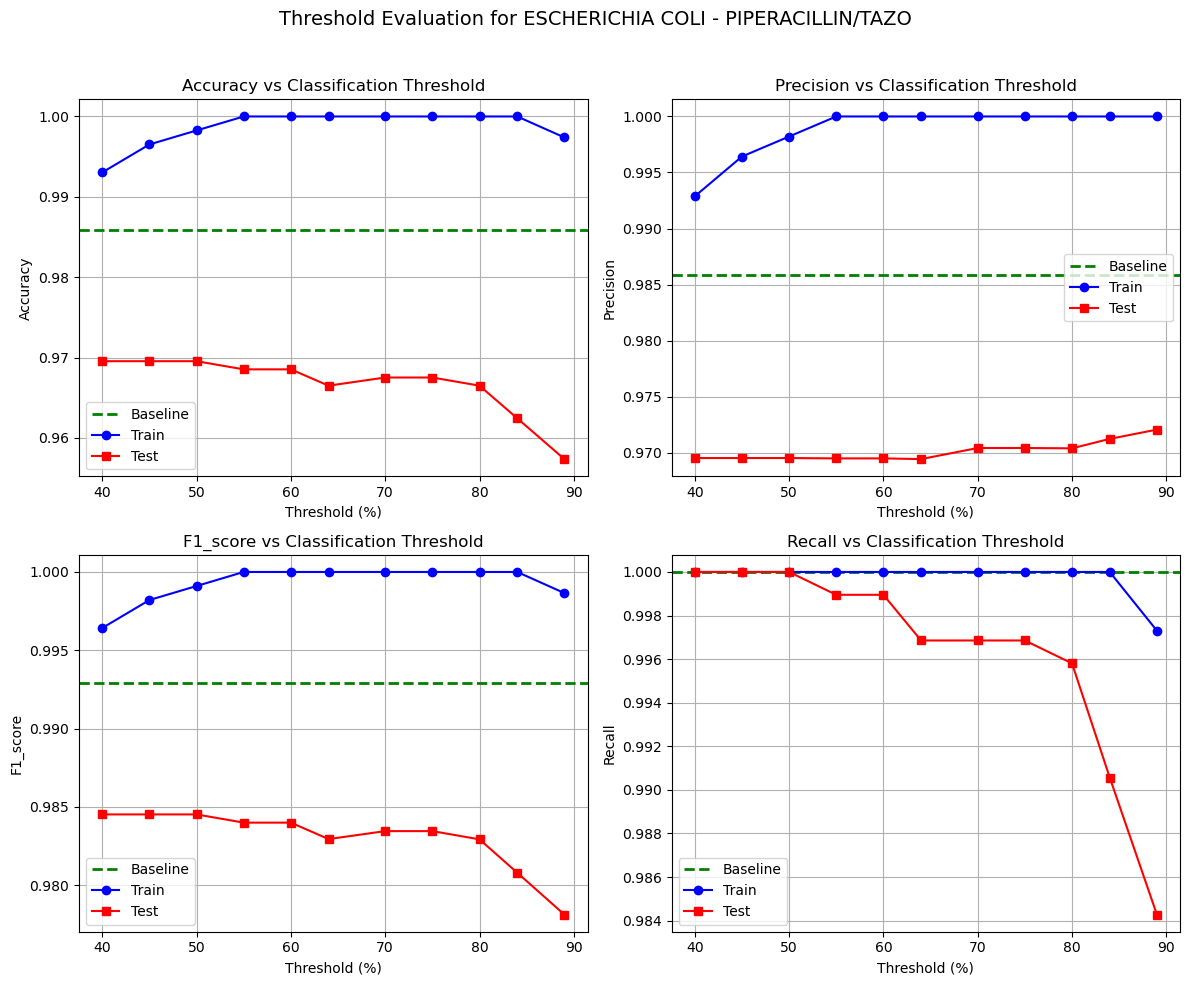

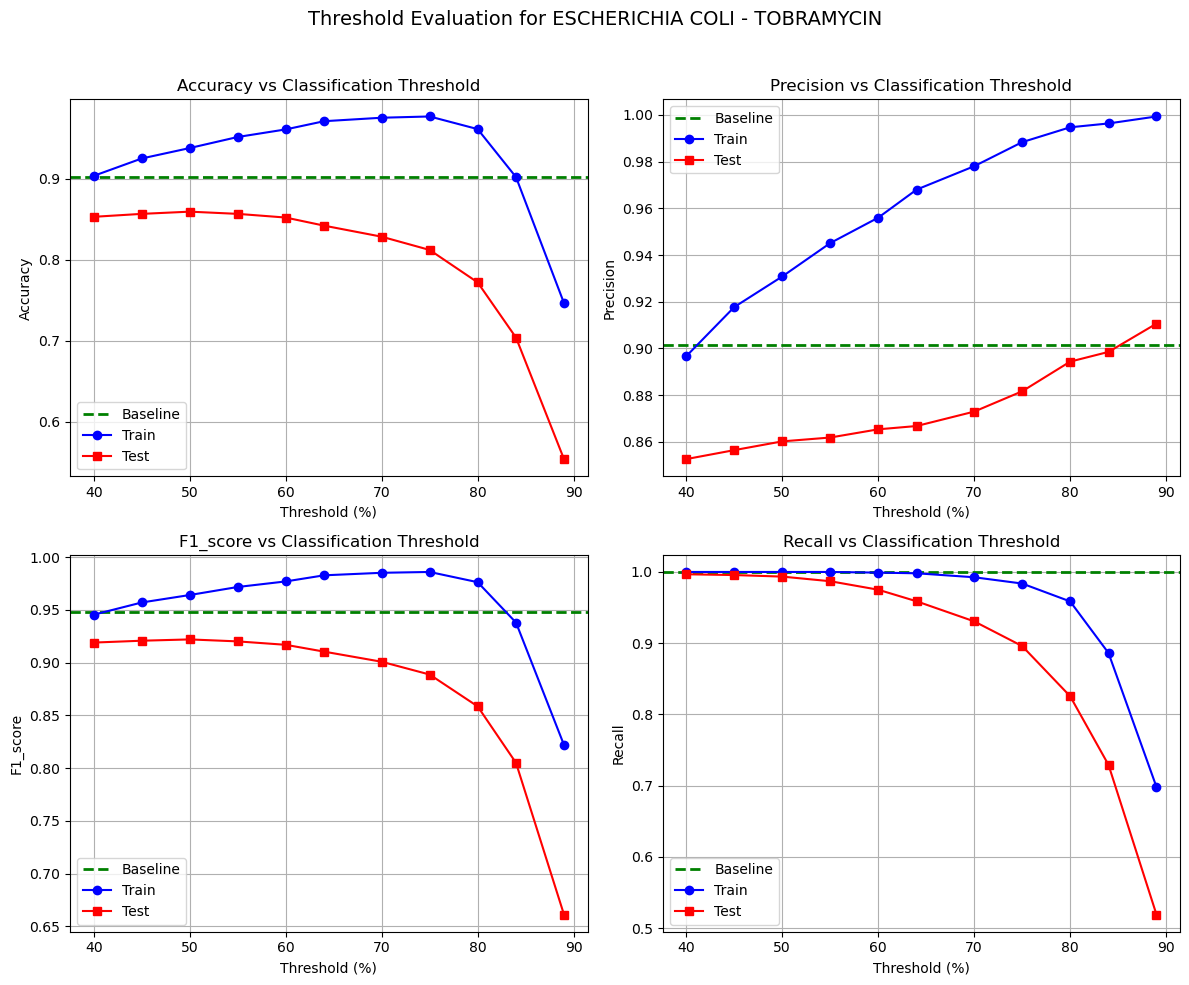

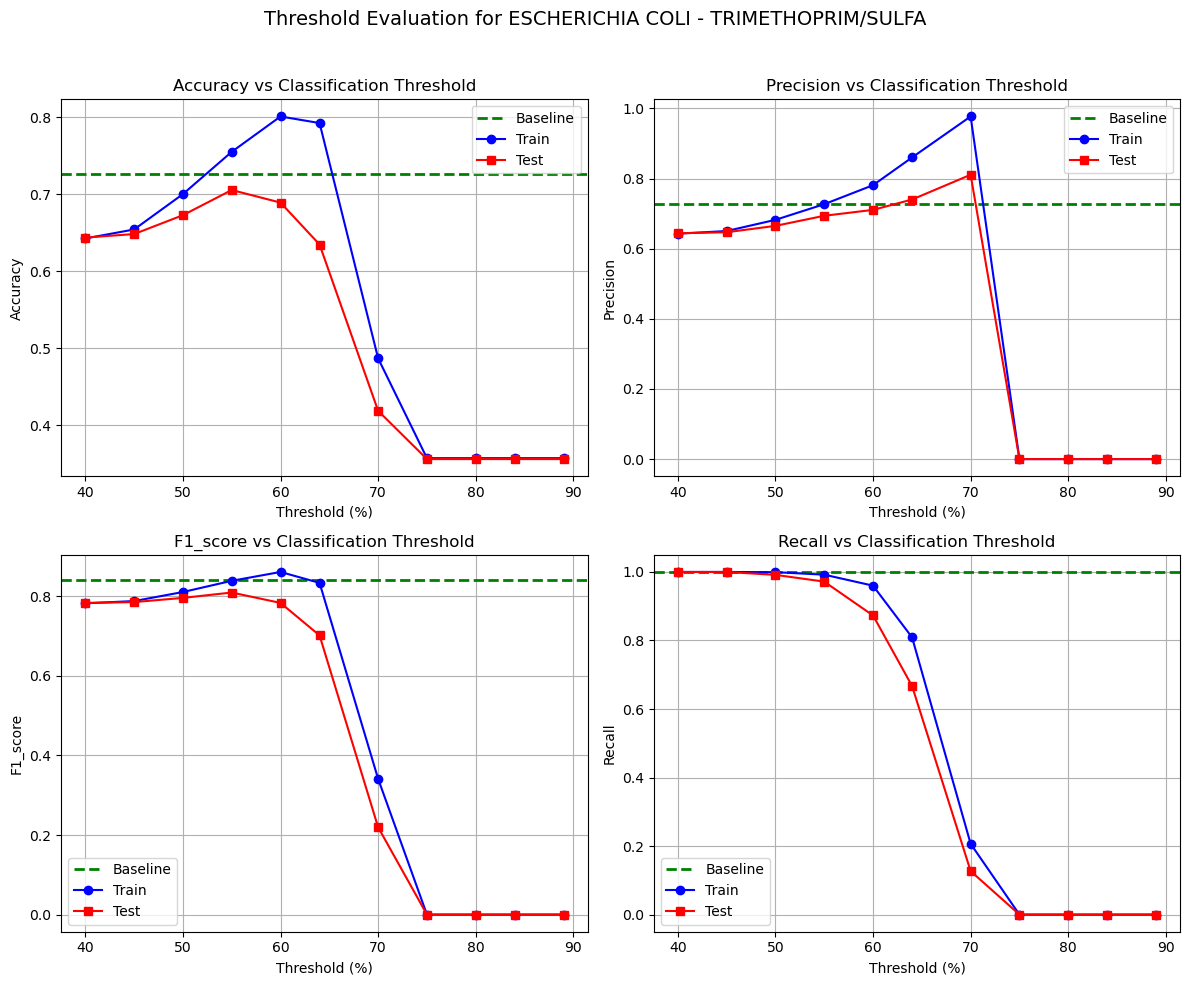

In [111]:
import matplotlib.pyplot as plt

# Plot all metrics in a 2x2 grid for each bacteria-antibiotic pair
for bacteria, antibiotic in ecoli_antibiotic_pairs:

    # Create a 2x2 figure layout
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Threshold Evaluation for {bacteria} - {antibiotic}", fontsize=14)

    metrics = ["accuracy", "precision", "f1_score", "recall"]
    axes = axes.flatten()  # Flatten 2D array of axes for easy iteration

    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Retrieve metric results
        if bacteria not in threshold_eval_dict or antibiotic not in threshold_eval_dict[bacteria]:
            print(f"No data found for {bacteria} - {antibiotic}.")
            continue

        metric_results = threshold_eval_dict[bacteria][antibiotic]

        if metric not in metric_results:
            print(f"Invalid metric: {metric}. Skipping...")
            continue

        thresholds = np.array(list(map(int, metric_results[metric].keys())))  # Convert threshold keys to numeric values
        train_values = [v[0] for v in metric_results[metric].values()]
        test_values = [v[1] for v in metric_results[metric].values()]

        # Retrieve baseline value
        baseline_value = baseline_results.loc[
            (baseline_results['bacteria'] == bacteria) & (baseline_results['antibiotic'] == antibiotic), metric
        ]

        if not baseline_value.empty:
            baseline_value = baseline_value.values[0]  # Extract single value
            ax.axhline(y=baseline_value, color="green", linestyle="dashed", linewidth=2, label="Baseline")

        # Plot train & test metrics
        ax.plot(thresholds, train_values, marker='o', linestyle='-', label="Train", color="blue")
        ax.plot(thresholds, test_values, marker='s', linestyle='-', label="Test", color="red")

        ax.set_xlabel("Threshold (%)")
        ax.set_ylabel(metric.capitalize())
        ax.set_title(f"{metric.capitalize()} vs Classification Threshold")
        ax.legend()
        ax.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
    plt.show()

    print("\n\n\n\n\n")
